### This example shows how to do second order EWMA without using pandas and save the plot.

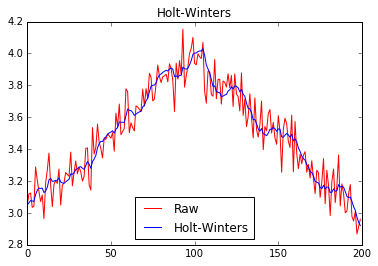

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


#import pandas
#ewma = pandas.stats.moments.ewma

 
def holt_winters_second_order_ewma( x, span, beta ):
    N = x.size
    alpha = 2.0 / ( 1 + span )
    s = np.zeros(( N, ))
    b = np.zeros(( N, ))
    s[0] = x[0]
    for i in range( 1, N ):
        s[i] = alpha * x[i] + ( 1 - alpha )*( s[i-1] + b[i-1] )
        b[i] = beta * ( s[i] - s[i-1] ) + ( 1 - beta ) * b[i-1]
    return s
 
# make a hat function, and add noise
x = np.linspace(0,1,100)
x = np.hstack((x,x[::-1]))
x += np.random.normal( loc=0, scale=0.1, size=200 ) + 3.0
# print(x)

plt.plot(x,'r', label="Raw") # asumes x axis is 0,1,2,3,...
plt.plot(holt_winters_second_order_ewma( x, 10, 0.3 ), 'b', label='Holt-Winters' )
plt.title('Holt-Winters')
plt.legend( loc=8 )
plt.savefig( 'holt_winters.png', dpi=100 )
plt.show() 
